# Introduction to ML projects

<img src="https://www.mrtfuelcell.polimi.it/images/logo_poli.jpg" height="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Python_logo_and_wordmark.svg" height="150">

A2A ML Course - day 3 - xx/09/2024

## Outline

1. Machine Learining project structure
2. Hands-on ML project


## Learning obejctives

* Understand the necessary steps to complete a ML project
* Estimate the timeframe required for a ML project
* First hand experience with programming a simple ML project





## Machine Learning project structure

<img src="https://freesvg.org/img/Brain-Computer.png" width="300">

Despite the numerous possible projects that can be solved using Machine Learning and Deep Learning the general project structure to follow will be almost the same every time. 

Surprisingly, the the biggest decisions that have to be made are not about the ML or DL models, **they are about data**.

This lesson is created to give you understanding of the necessary steps needed to acomplish any ML project no matter of the size of the dataset. With hands-on experience, you will be able to understand where lies the actual difficulty of ML projects.

### Structure outline

```mermaid
flowchart TD


A[**DATA**] -->|What problem we want to solve with data?| B[Problem Definition]
B --> |How the data can help us solve the problem?| C[Explorative Data Analysis]
C --> |Does the data need to be transformed?| D{Decision} 
D --> |YES| E[Data transformation and feature engineering]
E -.-> |Do the presented features expose information on the problem?| C
D --> |"NO (rare)"| F[Model development]
E --> F
F --> |Are the model results satisfactory?| G{Decision}
G --> |YES| H[Present your results and launch the product]
G --> |NO| I[Take a step back]
I -.-> |Should we try a different model? Or fine tune the existing one?| F 
I -.-> |Should we add new features?| E
H --> J[**CONGRATULATIONS!** You finished the project]

```

To summarise the main steps can be described as:

| N° | Step | Details |
| --- | --- | --- |
|1. | **GET DATA** | Acquire and curate the dataset. Define the problem to solve |
|2. | **EDA** | Explore the data to understand how (and **if**!) you can use it to solve the problem |
|3. | **FEATURE ENG.** | Transform the data to better fit your needs |
|4. | **MODELING** |Develop ML/DL models, test them, fine tune them for better results |
|5. | **PRESENT AND LAUNCH** | Get feedback from experts in topic, launch your project on the platform of choice|

The **IF** in the second point is crucial for development of *useful* ML projects.
ML is often called a **black-box**. However it is not a *magic* black-box.
You can not solve *any* problem using *any* data. The data has to facilitate the solution of the problem.

>**A reasonable data-driven problem definition is necessary for development of good ML projects.**

Development of ML projects should come from cooperation between Data Scientists and Engineers who understand the topic through and through.

## Hands-on ML project

### 1. Get the data and define the problem

Any project has to start somewhere, an ML project starts with data acquisition. In reality, the process of data acquisition and preprocessing is a highly complex problem in itself. So big companies have people to do that for them (so called *Data Engineers*) 

Fortunately for us, let's consider the step already done and let's begin with loading our csv datasets.

*Replace links with github*

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
data_energy = pd.read_csv('./data/energy_supply.csv')
data_weather = pd.read_csv('./data/weather_features.csv')

Problem definition

Supervised learning problem - we have to define inputs and labels

### 2. Explorative data analysis

We load two datasets:
1. The electricity generation in Spain
2. The weather data from 5 big cities in Spain

In [67]:
data_energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [68]:
data_energy.columns.to_list()

['time',
 'generation biomass',
 'generation fossil brown coal/lignite',
 'generation fossil coal-derived gas',
 'generation fossil gas',
 'generation fossil hard coal',
 'generation fossil oil',
 'generation fossil oil shale',
 'generation fossil peat',
 'generation geothermal',
 'generation hydro pumped storage aggregated',
 'generation hydro pumped storage consumption',
 'generation hydro run-of-river and poundage',
 'generation hydro water reservoir',
 'generation marine',
 'generation nuclear',
 'generation other',
 'generation other renewable',
 'generation solar',
 'generation waste',
 'generation wind offshore',
 'generation wind onshore',
 'forecast solar day ahead',
 'forecast wind offshore eday ahead',
 'forecast wind onshore day ahead',
 'total load forecast',
 'total load actual',
 'price day ahead',
 'price actual']

In [69]:
# zero_generation_columns = [
#     'generation fossil coal-derived gas',
#     'generation fossil oil shale',
#     'generation fossil peat',
#     'generation geothermal',
#     'generation hydro pumped storage aggregated',
#     'generation marine',
#     'generation wind offshore',
#     'forecast wind offshore eday ahead'
# ]

Let's extract the desired target data. But first, we will start with a very easy (but very useful) operation. 

When dealing with time series data, it is very useful to have the time column be your index. The first line does exactly that:

In [77]:
data_energy.index = pd.to_datetime(data_energy['time'], utc=True) # Have 'time' col as index
data_solar = data_energy['generation solar'] # Get solar data
data_solar

time
2014-12-31 23:00:00+00:00    49.0
2015-01-01 00:00:00+00:00    50.0
2015-01-01 01:00:00+00:00    50.0
2015-01-01 02:00:00+00:00    50.0
2015-01-01 03:00:00+00:00    42.0
                             ... 
2018-12-31 18:00:00+00:00    85.0
2018-12-31 19:00:00+00:00    33.0
2018-12-31 20:00:00+00:00    31.0
2018-12-31 21:00:00+00:00    31.0
2018-12-31 22:00:00+00:00    31.0
Name: generation solar, Length: 35064, dtype: float64

Having the time as your index allows to do many cool operations:

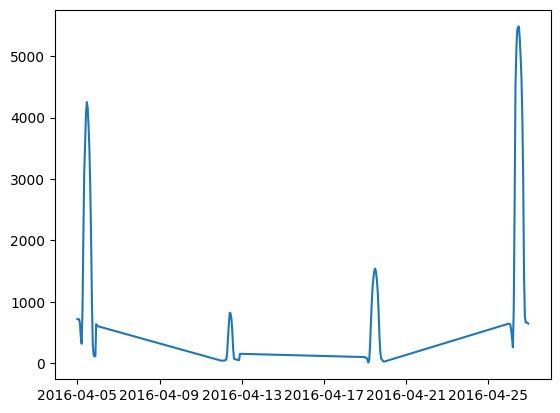

In [100]:
plt.plot(data_solar[data_solar.index.day_name() == 'Tuesday']['2016-04'])

In [72]:
data_weather

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178391,2018-12-31 19:00:00+01:00,Seville,287.760,287.150,288.150,1028,54,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178392,2018-12-31 20:00:00+01:00,Seville,285.760,285.150,286.150,1029,62,3,30,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178393,2018-12-31 21:00:00+01:00,Seville,285.150,285.150,285.150,1028,58,4,50,0.0,0.0,0.0,0,800,clear,sky is clear,01n
178394,2018-12-31 22:00:00+01:00,Seville,284.150,284.150,284.150,1029,57,4,60,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [73]:
data_weather.city_name.unique().tolist()

['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville']

In [74]:
data_weather.weather_main.value_counts()

weather_main
clear           82685
clouds          68055
rain            17391
mist             3908
fog              2506
drizzle          1724
thunderstorm     1041
haze              435
dust              347
snow              270
smoke              33
squall              1
Name: count, dtype: int64

In [75]:
data_weather.weather_description.value_counts()

weather_description
sky is clear                    82685
few clouds                      32101
broken clouds                   17448
scattered clouds                15945
light rain                      10905
mist                             3908
moderate rain                    3621
overcast clouds                  2561
fog                              2506
light intensity drizzle          1241
heavy intensity rain             1142
light intensity shower rain       657
proximity thunderstorm            480
proximity shower rain             476
haze                              435
shower rain                       426
drizzle                           369
dust                              345
thunderstorm                      309
light snow                        140
thunderstorm with rain            127
thunderstorm with light rain       92
heavy intensity shower rain        81
light intensity drizzle rain       79
very heavy rain                    78
snow                          

1. Extract the label from the first dataset
2. Experiment on the second dataset train an average model using whatever (to get shit results)
3. Numerical features vs categorical features
3. Go back adding an important feature, divide wind or hours into cos and sin
4. Add categorical variable based on the weather function

